In [8]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [9]:
def cdf(x):
    return max(min(((x-900)**2)/10000, 1),0)
def inverse_cdf(x):
    return 900+100*np.sqrt(x)

In [10]:
#simulate for each price pairing and calculate mean and variance of profits across N_SIMULATIONS simulations

N_GOLDFISH = 10000
N_SIMULATIONS = 1000
results = []
profits = {}
for _ in tqdm(range(N_SIMULATIONS), desc="Simulating..."):
    #draw N_GOLDFISH samples from the reserve price distribution
    total_profit = 0
    uniform_samples = np.random.uniform(0, 1, N_GOLDFISH)
    res_prices = np.array([inverse_cdf(u) for u in uniform_samples])
    #iterate over all reasonable price pairs
    for p1 in range(901, 999):
        for p2 in range(995, 1000):
            #calculate profits for current simulation iteration and record mean, variance, and price pair
            total_profit = 0
            for i in range(N_GOLDFISH):
                if res_prices[i] < p1:
                    total_profit += 1000 - p1
                elif res_prices[i] < p2:
                    total_profit += 1000 - p2
                else:
                    total_profit += 0
            pair = (p1, p2)
            if pair not in profits:
                profits[pair] = []
            profits[pair].append(total_profit)
for pair in tqdm(profits, desc="Calculating results..."):
    mean_profit = np.mean(profits[pair])
    variance = np.var(profits[pair])
    results.append((mean_profit, variance, pair))       
# # order results by mean profit descending
results = sorted(results, key=lambda x: x[0], reverse=True)

Calculating results...: 100%|██████████| 490/490 [00:00<00:00, 15491.02it/s]


Top 100 price pairings:
Price Pairing: (963, 995), Mean Profit: 172139, Variance: 2370211
Price Pairing: (964, 995), Mean Profit: 172108, Variance: 2299108
Price Pairing: (962, 995), Mean Profit: 171973, Variance: 2460103
Price Pairing: (965, 995), Mean Profit: 171893, Variance: 2180026
Price Pairing: (961, 995), Mean Profit: 171642, Variance: 2615478
Price Pairing: (966, 995), Mean Profit: 171464, Variance: 2079806
Price Pairing: (960, 995), Mean Profit: 171134, Variance: 2714143
Price Pairing: (967, 995), Mean Profit: 170846, Variance: 1930903
Price Pairing: (959, 995), Mean Profit: 170436, Variance: 2825668
Price Pairing: (968, 995), Mean Profit: 169992, Variance: 1826366
Price Pairing: (958, 995), Mean Profit: 169587, Variance: 2938180
Price Pairing: (969, 995), Mean Profit: 168939, Variance: 1712345
Price Pairing: (957, 995), Mean Profit: 168579, Variance: 3054521
Price Pairing: (964, 996), Mean Profit: 167947, Variance: 2387567
Price Pairing: (965, 996), Mean Profit: 167861, Vari

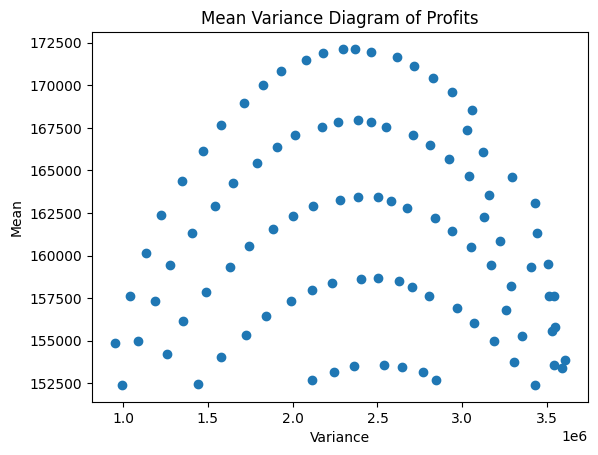

In [11]:
n = 100
print(f"Top {n} price pairings:")
for i in range(n):
    print(f"Price Pairing: {results[i][2]}, Mean Profit: {int(results[i][0])}, Variance: {int(results[i][1])}")
        
#plot the mean variance diagram of profits for top n
means = [r[0] for r in results[:n]]
variances = [r[1] for r in results[:n]]
plt.scatter(variances, means)
plt.xlabel("Variance")
plt.ylabel("Mean")
plt.title("Mean Variance Diagram of Profits")
#label points with 5 highest means
plt.show()